# Earlang-A Queue Model without Delay (N=2)

In [4]:
import numpy as np
import sympy as sym
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import ipywidgets as widgets

def ODE_System(q, t, l, mu, theta, c, gamma):
    [q1, q2] = q
    dqdt = [(l)/(1 + np.exp(gamma*(q1 - q2))) - (mu * min(q1, c) ) - (theta * max(q1 - c, 0)),  (l)/(1 + np.exp(gamma*(q2 - q1))) - (mu * min(q2, c) ) - (theta * max(q2 - c, 0))]
    return dqdt

# Define initial condition widgets

q01 = widgets.IntSlider(
    value = 20, 
    min = 0, max = 100, 
    step = 1, 
    description = 'Initial q1:', 
    orientation = 'horizontal'
)

q02 = widgets.IntSlider(
    value = 40, 
    min = 0, max = 100, 
    step = 1, 
    description = 'Initial q2:', 
    orientation = 'horizontal'
)

# Define parameter widgets

lam = widgets.FloatSlider(
    value = 50, 
    min = 0, max = 200, 
    step = 1, 
    description = 'lambda:', 
)
mu = widgets.FloatSlider(
    value = 1, 
    min = 0, max = 10, 
    step = 0.1, 
    description = 'mu:', 
)
theta = widgets.FloatSlider(
    value = 2, 
    min = 0, max = 10, 
    step = 0.1, 
    description = 'theta:', 
)
c = widgets.IntSlider(
    value = 55, 
    min = 0, max = 200,  
    description = 'c:', 
)
gamma = widgets.FloatSlider(
    value = 5, 
    min = 0, max = 100, 
    step = 1, 
    description = 'gamma:', 
)


In [5]:
display(q01)
display(q02)

display(lam)
display(mu)
display(theta)
display(c)
display(gamma)

IntSlider(value=20, description='Initial q1:')

IntSlider(value=40, description='Initial q2:')

FloatSlider(value=50.0, description='lambda:', max=200.0, step=1.0)

FloatSlider(value=1.0, description='mu:', max=10.0)

FloatSlider(value=2.0, description='theta:', max=10.0)

IntSlider(value=55, description='c:', max=200)

FloatSlider(value=5.0, description='gamma:', step=1.0)

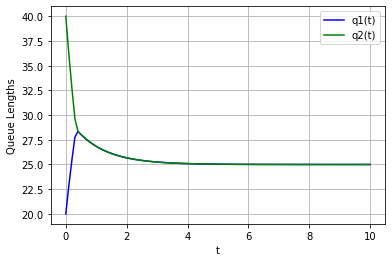

In [6]:
# initial condition
q0 = [q01.value, q02.value]

# time range that we consider
t = np.linspace(0, 10, 101)

solution = odeint(ODE_System, q0, t, args=(lam.value, mu.value, theta.value, c.value, gamma.value))

# Plot
plt.plot(t, solution[:, 0], 'b', label = 'q1(t)')
plt.plot(t, solution[:, 1], 'g', label = 'q2(t)')
plt.legend(loc = 'best')
plt.xlabel('t')
plt.ylabel('Queue Lengths')
plt.grid()
plt.show()